<a href="https://colab.research.google.com/github/wakeeldaoula/IDS-CCP/blob/main/Data_Cleaning_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
dataset = pd.read_csv("/global_air_quality_data_10000.csv")

In [24]:
print(dataset.shape) # (Instances, Features)


(10000, 12)


In [25]:
print(dataset.columns)

Index(['City', 'Country', 'Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'Temperature', 'Humidity', 'Wind Speed'],
      dtype='object')


In [26]:
print(dataset.dtypes)

City            object
Country         object
Date            object
PM2.5          float64
PM10           float64
NO2            float64
SO2            float64
CO             float64
O3             float64
Temperature    float64
Humidity       float64
Wind Speed     float64
dtype: object


In [27]:
# Since Date is Object type we should convert it into datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])
print(dataset.dtypes)

City                   object
Country                object
Date           datetime64[ns]
PM2.5                 float64
PM10                  float64
NO2                   float64
SO2                   float64
CO                    float64
O3                    float64
Temperature           float64
Humidity              float64
Wind Speed            float64
dtype: object


In [28]:
dataset['Date']

,Date
0,2023-03-19
1,2023-02-16
2,2023-11-13
3,2023-03-16
4,2023-04-04
...,...
9995,2023-09-16
9996,2023-12-05
9997,2023-11-26
9998,2023-02-03


In [29]:
dataset.head(10) # viewing first 10 rows

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16
5,Los Angeles,USA,2023-01-05,121.28,196.39,86.17,28.74,2.64,46.86,18.53,43.01,3.96
6,Tokyo,Japan,2023-09-17,118.76,15.69,12.99,39.05,3.04,15.75,-1.37,17.76,17.66
7,New York,USA,2023-11-23,72.52,23.43,92.01,15.26,4.57,106.50,32.14,76.57,9.42
8,Tokyo,Japan,2023-09-21,131.46,145.57,10.13,25.10,9.08,181.72,-6.20,71.42,16.81
9,London,UK,2023-09-13,64.71,92.84,92.98,36.40,3.68,88.44,19.80,45.92,2.56


**A simple Detail Of Each Feature**
City: The name of the city where the air quality measurement was taken.
Country: The country in which the city is located.
Date: The date when the measurement was recorded.
PM2.5: The concentration of fine particulate matter with a diameter of less than 2.5 micrometers (µg/m³).
PM10: The concentration of particulate matter with a diameter of less than 10 micrometers (µg/m³).
NO2: The concentration of nitrogen dioxide (µg/m³).
SO2: The concentration of sulfur dioxide (µg/m³).
CO: The concentration of carbon monoxide (mg/m³).
O3: The concentration of ozone (µg/m³).
Temperature: The temperature at the time of measurement (°C).
Humidity: The humidity level at the time of measurement (%).
Wind Speed: The wind speed at the time of measurement (m/s).

In [30]:
print(dataset.isnull().sum()) # Total Missing Values

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64


In [31]:
print(dataset.describe()) # A quick detail of dataset

                             Date         PM2.5          PM10           NO2  \
count                       10000  10000.000000  10000.000000  10000.000000   
mean   2023-06-29 00:28:56.640000     77.448439    104.438161     52.198649   
min           2023-01-01 00:00:00      5.020000     10.000000      5.010000   
25%           2023-03-28 00:00:00     41.185000     57.137500     28.347500   
50%           2023-06-27 00:00:00     77.725000    103.690000     52.100000   
75%           2023-09-27 00:00:00    113.392500    152.265000     75.705000   
max           2023-12-28 00:00:00    149.980000    200.000000    100.000000   
std                           NaN     41.927871     55.062396     27.320490   

                SO2            CO            O3  Temperature      Humidity  \
count  10000.000000  10000.000000  10000.000000  10000.00000  10000.000000   
mean      25.344490      5.047984    106.031643     14.89715     55.078579   
min        1.000000      0.100000     10.040000    -10

Checking For Outliers
For each numerical column:

Calculate Q1 (25th percentile) and Q3 (75th percentile)

IQR = Q3 – Q1

Lower bound = Q1 – 1.5*IQR

Upper bound = Q3 + 1.5*IQR

Values outside [Lower bound, Upper bound] are considered outliers.

In [32]:
dataset_Numeric = dataset.select_dtypes(include=np.float64)
dataset_Numeric.head()

,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [33]:
# creating list of numerical columns for using in loop
numeric_columns = dataset_Numeric.columns.to_list()
numeric_columns

['PM2.5',
 'PM10',
 'NO2',
 'SO2',
 'CO',
 'O3',
 'Temperature',
 'Humidity',
 'Wind Speed']

In [34]:
# Create a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers for each numerical column
outlier_summary = {}
for col in numeric_columns:
    outliers, lb, ub = detect_outliers_iqr(dataset_Numeric, col)
    outlier_summary[col] = {
        'outlier_count': len(outliers),
        'lower_bound': lb,
        'upper_bound': ub
    }
    print(f"{col}: {len(outliers)} outliers (bounds: [{lb:.2f}, {ub:.2f}])")

PM2.5: 0 outliers (bounds: [-67.13, 221.70])
PM10: 0 outliers (bounds: [-85.55, 294.96])
NO2: 0 outliers (bounds: [-42.69, 146.74])
SO2: 0 outliers (bounds: [-23.28, 73.97])
CO: 0 outliers (bounds: [-4.82, 14.86])
O3: 0 outliers (bounds: [-85.02, 297.39])
Temperature: 0 outliers (bounds: [-35.43, 65.07])
Humidity: 0 outliers (bounds: [-34.84, 144.81])
Wind Speed: 0 outliers (bounds: [-9.38, 29.74])


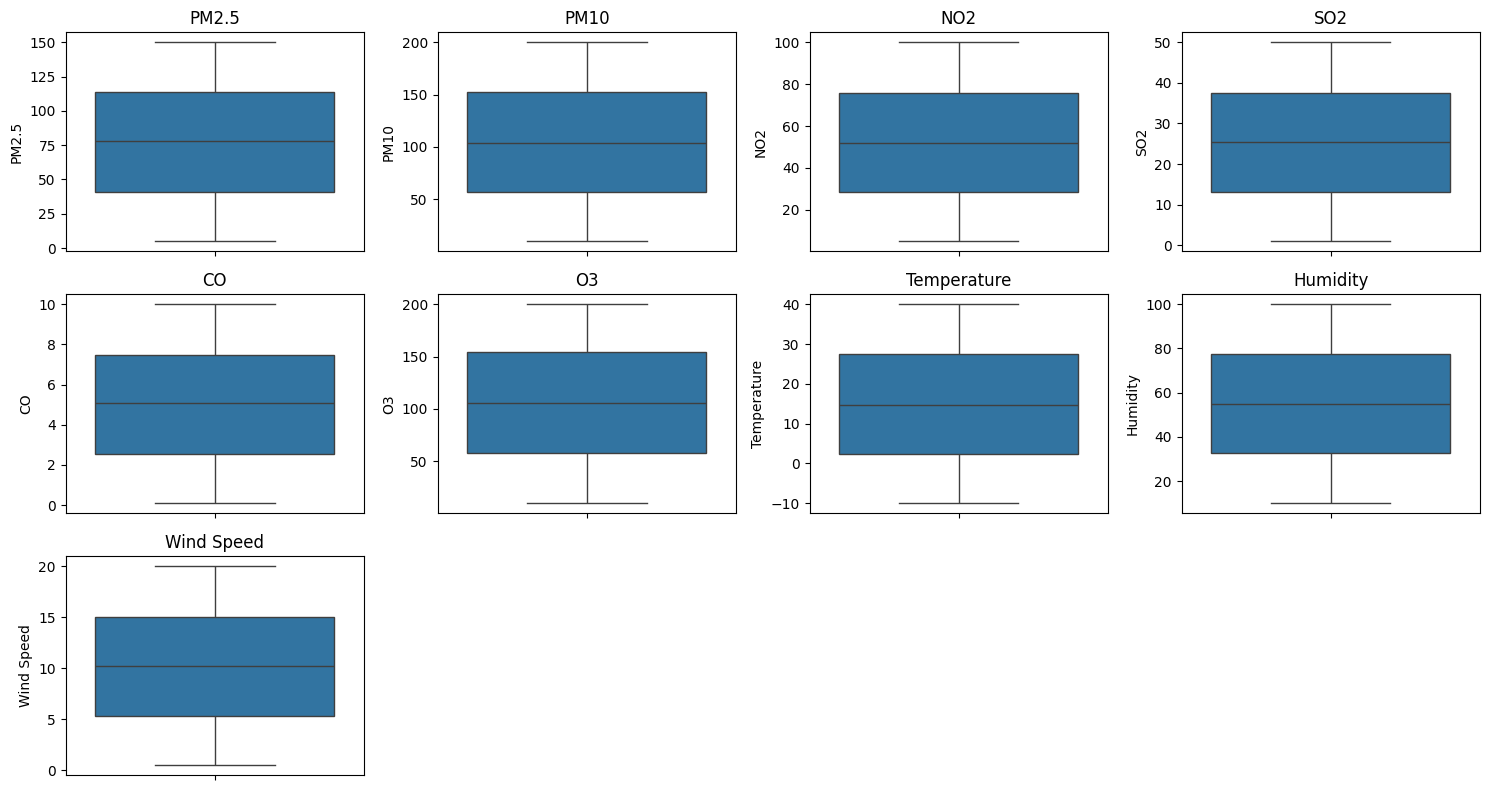

In [35]:
# Visualizing Outliers Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=dataset_Numeric[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [38]:
from scipy import stats
z_scores = np.abs(stats.zscore(dataset[numeric_columns]))
outliers_z = (z_scores > 3).sum(axis=0)
print("Outliers per column (Z-score > 3):")
print(outliers_z)

Outliers per column (Z-score > 3):
[0 0 0 0 0 0 0 0 0]


In [40]:
# Generating AQI using US EPA method
# The units of pollutants (CO, PM2.5, PM10 etc) are already in microgram per meter cube.

In [56]:
# Define breakpoints in a dictionary (for µg/m³)
breakpoints = {
    'PM2.5': [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150),
              (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 500.4, 301, 500)],
    'PM10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150),
             (255, 354, 151, 200), (355, 424, 201, 300), (425, 604, 301, 500)],
    'NO2': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150),
            (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 2049, 301, 500)],
    'SO2': [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150),
            (186, 304, 151, 200), (305, 604, 201, 300), (605, 1004, 301, 500)],
    'CO': [(0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150),
           (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 50.4, 301, 500)],
    'O3': [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150),
           (86, 105, 151, 200), (106, 200, 201, 300), (201, 500, 301, 500)]
}

def calc_aqi_for_pollutant(concentration, pollutant):
    for low, high, aqi_low, aqi_high in breakpoints[pollutant]:
        if low <= concentration <= high:
            return ((aqi_high - aqi_low) / (high - low)) * (concentration - low) + aqi_low
    # If concentration exceeds highest breakpoint
    return 500  # Max AQI

# Calculate AQI for each pollutant
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
for pol in pollutants:
    dataset[f'AQI_{pol}'] = dataset[pol].apply(lambda x: calc_aqi_for_pollutant(x, pol))

# Overall AQI = max of all pollutant AQIs
dataset['AQI'] = dataset[[f'AQI_{pol}' for pol in pollutants]].max(axis=1)

print(dataset[['PM2.5', 'PM10', 'AQI']].head())

    PM2.5    PM10         AQI
0   86.57   25.19  500.000000
1   50.63   97.39  241.189787
2  130.21   57.22  278.209468
3  119.70  130.52  184.148577
4   55.20   36.62  149.507538


In [57]:
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy'
    elif aqi <= 200:
        return 'Very Unhealthy'
    elif aqi <= 300:
        return 'Hazardous'
    else:
        return 'Hazardous+'

dataset['AQI_Category'] = dataset['AQI'].apply(categorize_aqi)
print(dataset[['AQI', 'AQI_Category']].head())
print(dataset['AQI_Category'].value_counts())

          AQI    AQI_Category
0  500.000000      Hazardous+
1  241.189787       Hazardous
2  278.209468       Hazardous
3  184.148577  Very Unhealthy
4  149.507538       Unhealthy
AQI_Category
Hazardous         4727
Very Unhealthy    3226
Unhealthy          810
Hazardous+         789
Moderate           446
Good                 2
Name: count, dtype: int64


In [58]:
print(dataset)

                City       Country       Date   PM2.5    PM10    NO2    SO2  \
0            Bangkok      Thailand 2023-03-19   86.57   25.19  99.88  30.63   
1           Istanbul        Turkey 2023-02-16   50.63   97.39  48.14   8.71   
2     Rio de Janeiro        Brazil 2023-11-13  130.21   57.22  98.51   9.92   
3             Mumbai         India 2023-03-16  119.70  130.52  10.96  33.03   
4              Paris        France 2023-04-04   55.20   36.62  76.85  21.85   
...              ...           ...        ...     ...     ...    ...    ...   
9995    Johannesburg  South Africa 2023-09-16  147.85  184.34  90.33  34.93   
9996          Berlin       Germany 2023-12-05   12.22  121.49  49.04   5.66   
9997          Moscow        Russia 2023-11-26   44.07  143.62   8.41  32.58   
9998          Berlin       Germany 2023-02-03   67.43   96.79  43.23  29.19   
9999         Bangkok      Thailand 2023-06-13   16.34   28.80  50.48  21.20   

        CO      O3  Temperature  Humidity  Wind Spe

In [59]:
print(dataset.columns)

Index(['City', 'Country', 'Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'Temperature', 'Humidity', 'Wind Speed', 'AQI', 'AQI_Category',
       'AQI_PM2.5', 'AQI_PM10', 'AQI_NO2', 'AQI_SO2', 'AQI_CO', 'AQI_O3'],
      dtype='object')


In [60]:
# Dropping the intermediate columns
dataset = dataset.drop(columns=['AQI_PM2.5', 'AQI_PM10', 'AQI_NO2', 'AQI_SO2', 'AQI_CO', 'AQI_O3'])

In [48]:
print(dataset)

                City       Country       Date   PM2.5    PM10    NO2    SO2  \
0            Bangkok      Thailand 2023-03-19   86.57   25.19  99.88  30.63   
1           Istanbul        Turkey 2023-02-16   50.63   97.39  48.14   8.71   
2     Rio de Janeiro        Brazil 2023-11-13  130.21   57.22  98.51   9.92   
3             Mumbai         India 2023-03-16  119.70  130.52  10.96  33.03   
4              Paris        France 2023-04-04   55.20   36.62  76.85  21.85   
...              ...           ...        ...     ...     ...    ...    ...   
9995    Johannesburg  South Africa 2023-09-16  147.85  184.34  90.33  34.93   
9996          Berlin       Germany 2023-12-05   12.22  121.49  49.04   5.66   
9997          Moscow        Russia 2023-11-26   44.07  143.62   8.41  32.58   
9998          Berlin       Germany 2023-02-03   67.43   96.79  43.23  29.19   
9999         Bangkok      Thailand 2023-06-13   16.34   28.80  50.48  21.20   

        CO      O3  Temperature  Humidity  Wind Spe

In [63]:
print(dataset.columns)

Index(['City', 'Country', 'Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'Temperature', 'Humidity', 'Wind Speed', 'AQI', 'AQI_Category'],
      dtype='object')


In [64]:
# Now we dump the dataset for our EDA
import pickle
with open("preprocessed_data_for_EDA.pkl", "wb") as f:
  pickle.dump(dataset, f)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [65]:
dataset['City'].unique()

array(['Bangkok', 'Istanbul', 'Rio de Janeiro', 'Mumbai', 'Paris',
       'Los Angeles', 'Tokyo', 'New York', 'London', 'Seoul', 'Cairo',
       'Mexico City', 'Berlin', 'Beijing', 'Sydney', 'Dubai', 'Toronto',
       'Madrid', 'Johannesburg', 'Moscow'], dtype=object)

In [66]:
dataset['Country'].unique()

array(['Thailand', 'Turkey', 'Brazil', 'India', 'France', 'USA', 'Japan',
       'UK', 'South Korea', 'Egypt', 'Mexico', 'Germany', 'China',
       'Australia', 'UAE', 'Canada', 'Spain', 'South Africa', 'Russia'],
      dtype=object)

In [67]:
# Encoding Country and City with OHE
dataset_encoded = pd.get_dummies(dataset, columns=['City', 'Country'], drop_first=True)  # drop_first avoids dummy trap

print(dataset_encoded.shape)
print(dataset_encoded.columns)

(10000, 49)
Index(['Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature',
       'Humidity', 'Wind Speed', 'AQI', 'AQI_Category', 'City_Beijing',
       'City_Berlin', 'City_Cairo', 'City_Dubai', 'City_Istanbul',
       'City_Johannesburg', 'City_London', 'City_Los Angeles', 'City_Madrid',
       'City_Mexico City', 'City_Moscow', 'City_Mumbai', 'City_New York',
       'City_Paris', 'City_Rio de Janeiro', 'City_Seoul', 'City_Sydney',
       'City_Tokyo', 'City_Toronto', 'Country_Brazil', 'Country_Canada',
       'Country_China', 'Country_Egypt', 'Country_France', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_Mexico', 'Country_Russia',
       'Country_South Africa', 'Country_South Korea', 'Country_Spain',
       'Country_Thailand', 'Country_Turkey', 'Country_UAE', 'Country_UK',
       'Country_USA'],
      dtype='object')


In [68]:
# Now we should do The
from sklearn.preprocessing import StandardScaler

# Select ONLY numeric features
numeric_features = ['PM2.5','PM10','NO2','SO2','CO','O3','Temperature','Humidity','Wind Speed','AQI']

scaler = StandardScaler()
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])


In [70]:
from sklearn.model_selection import train_test_split
# Features = All except target AND AQI
X = dataset.drop(['AQI_Category', 'AQI'], axis=1)  # AQI bhi drop
y = dataset['AQI_Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 8000
Testing samples: 2000


In [72]:
# Now wee should do EDA
import pickle
with open("/content/preprocessed_data_for_EDA.pkl", "rb") as f:
  df = pickle.load(f)

In [73]:
print(df)

                City       Country       Date   PM2.5    PM10    NO2    SO2  \
0            Bangkok      Thailand 2023-03-19   86.57   25.19  99.88  30.63   
1           Istanbul        Turkey 2023-02-16   50.63   97.39  48.14   8.71   
2     Rio de Janeiro        Brazil 2023-11-13  130.21   57.22  98.51   9.92   
3             Mumbai         India 2023-03-16  119.70  130.52  10.96  33.03   
4              Paris        France 2023-04-04   55.20   36.62  76.85  21.85   
...              ...           ...        ...     ...     ...    ...    ...   
9995    Johannesburg  South Africa 2023-09-16  147.85  184.34  90.33  34.93   
9996          Berlin       Germany 2023-12-05   12.22  121.49  49.04   5.66   
9997          Moscow        Russia 2023-11-26   44.07  143.62   8.41  32.58   
9998          Berlin       Germany 2023-02-03   67.43   96.79  43.23  29.19   
9999         Bangkok      Thailand 2023-06-13   16.34   28.80  50.48  21.20   

        CO      O3  Temperature  Humidity  Wind Spe

In [ ]:
# Univariate DA
